# NEURAL NETWORK ON FOREST FIRE DATASET

In [5]:
!pip install keras

In [34]:
# Create your first MLP in Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
import numpy

In [9]:
data=pd.read_csv('forestfires.csv')
data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [10]:
#Checking for null values & data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

## This dataset contains more number of columns,to perform neural network it takes more time , so we reduce number of columns ,by PCA Technique.

## PCA

In [11]:
#Scaling the data (leaving out the target variable, and the taking only the numerical data for input)
data1= data.iloc[:,2:30]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(data1)
df_norm = sc.transform(data1)
df_norm                     #Normalised dataset

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components =28)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  4.98037274e-16, -2.73530281e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -9.55928328e-15,  1.15055466e-15],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  2.58690766e-15, -5.66797432e-17],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -1.84247930e-16,  2.36645381e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02, -2.30354869e-16,  2.72058887e-16],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  5.70142521e-17,  8.50237385e-17]])

In [22]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 1.95971390e-33])

In [23]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

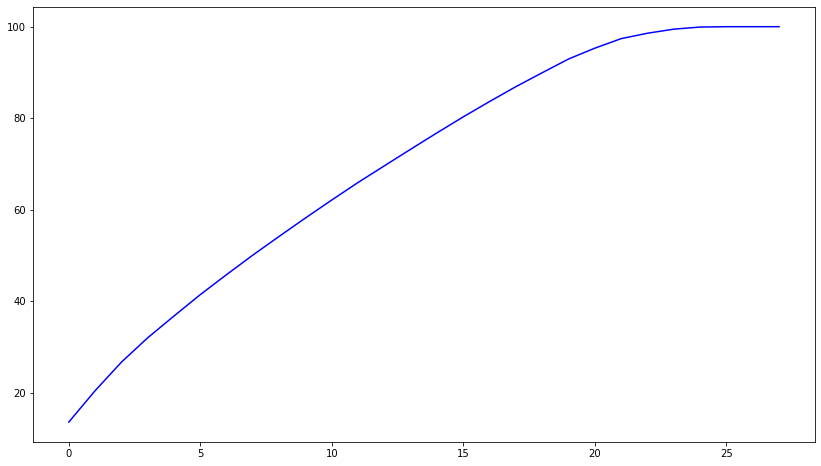

In [26]:
# Variance plot for PCA components obtained
plt.figure(figsize=(14,8))
plt.plot(var1,color="blue");

## The 1st 22 data gives the 95% of the information , so we take 22 out of 28

In [28]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:22],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22']),
                     data[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    3.766709 -1.320255 -0.843971 -1.994738 -1.453359  0.693985  0.308104   
1    0.390786  0.831062 -1.101365  1.400671  2.869388  0.965898 -2.795574   
2    0.690416  1.177746 -1.221998  2.442038  1.090630  0.390801 -1.586675   
3    3.359951 -1.161443  0.385728 -2.118328 -1.949601  1.027664 -0.179422   
4    2.974329 -0.842626  1.327788  0.038086 -1.124763 -0.574676 -0.777155   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.087560  0.153964  1.241810  1.536581  0.372425 -1.133422 -0.362287   
513  0.794366 -0.083966  2.670485  0.284995  0.223323 -0.904232 -0.014849   
514  0.921634 -0.264543  2.719216 -0.019643  0.242195 -0.966939 -0.118080   
515 -1.620549 -0.978838  0.331987  1.256638 -0.408164  0.735698  0.815510   
516  4.075907 -0.367441 -0.247152  0.979966  6.792273  5.943666 -1.639583   

          pc8       pc9      pc10  ...      pc14      pc15       pc16  \
0   -0.019764  0.010161 -0.437314  ... -0.671216 -0.529599  -0.197543   
1    0.041095 -0.548879  0.104500  ...  1.417634 -0.879983  -2.503167   
2   -2.159336 -0.090580  0.260888  ...  1.477351 -0.946682  -2.545144   
3   -0.250227 -0.620329 -1.343189  ... -0.752744  0.349346  -0.040887   
4    0.303635  0.861126 -2.024719  ... -0.823316  0.402298   0.844431   
..        ...       ...       ...  ...       ...       ...        ...   
512  0.766946  0.818745 -0.289632  ...  0.197490 -0.801640   0.300522   
513  0.107226  1.340049 -0.147246  ...  0.162358 -0.274733   0.342367   
514  0.123010  1.290364 -0.177553  ...  0.062647 -0.494765   0.332816   
515 -1.398344  0.076379 -0.005814  ...  0.246912 -0.147679  -0.011739   
516  8.121827 -0.627980  4.953722  ...  6.584205 -6.010301  10.467443   

         pc17      pc18      pc19      pc20      pc21      pc22  size_category  
0   -0.021839  0.688958  0.563603 -0.439596 -0.926619 -0.405425              0  
1    0.499649  0.563706 -0.703319 -1.535718 -0.892995  0.836590              0  
2   -0.658411 -0.423618  0.860550 -1.195230 -0.297870  0.743648              0  
3    0.017843  0.332572  1.164745 -1.632741 -0.817618  1.523710              0  
4    1.014944 -0.618231  0.822853 -1.794109 -0.723371  2.020419              0  
..        ...       ...       ...       ...       ...       ...            ...  
512  0.513876  0.539642 -0.052958  1.898628 -1.441786 -0.821192              1  
513  0.485571  0.580150  0.384984  0.086251 -0.970693 -1.353365              1  
514  0.344047  0.122409  0.313948  0.211157 -0.777731 -1.736711              1  
515 -1.035533 -0.774382 -0.216315  0.515791  0.080575 -0.055548              0  
516 -7.333036  0.377340  8.870354 -1.074288  2.382433  1.042850              0  

[517 rows x 23 columns]

## Split the data X and Y

In [30]:
# split into input (X) and output (Y) variables
array = finalDf.values
X = array[:,0:22]
Y = array[:,22]

X.reshape(-1,1)
Y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

## Creating model

In [32]:
# Importing necessary packages
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam


# Iteration 1

In [35]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=22, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
# Fit the model
model.fit(X, Y, validation_split=0.3, epochs=200, batch_size=10)

Epoch 1/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9972 - val_loss: 2.1582 - val_accuracy: 0.7628
Epoch 2/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9945 - val_loss: 2.1361 - val_accuracy: 0.7628
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.1429 - val_accuracy: 0.7628
Epoch 4/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.1425 - val_accuracy: 0.7628
Epoch 5/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.1365 - val_accuracy: 0.7628
Epoch 6/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.1515 - val_accuracy: 0.7628
Epoch 7/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.1341 - val_accuracy: 0.7628
Epoch 8/200
3

Epoch 59/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9972 - val_loss: 2.1956 - val_accuracy: 0.7628
Epoch 60/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9972 - val_loss: 2.1828 - val_accuracy: 0.7628
Epoch 61/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.1849 - val_accuracy: 0.7628
Epoch 62/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9972 - val_loss: 2.1934 - val_accuracy: 0.7628
Epoch 63/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9972 - val_loss: 2.1859 - val_accuracy: 0.7628
Epoch 64/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9972 - val_loss: 2.1895 - val_accuracy: 0.7756
Epoch 65/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9945 - val_loss: 2.1858 - val_accuracy: 0.7692
Epoch 

37/37 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 2.2978 - val_accuracy: 0.7821
Epoch 174/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 2.2938 - val_accuracy: 0.7885
Epoch 175/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9972 - val_loss: 2.3101 - val_accuracy: 0.7756
Epoch 176/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.2936 - val_accuracy: 0.7885
Epoch 177/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.3016 - val_accuracy: 0.7885
Epoch 178/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.3031 - val_accuracy: 0.7885
Epoch 179/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.3061 - val_accuracy: 0.7885
Epoch 180/200

In [42]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 998us/step - loss: 0.6563 - accuracy: 0.9284
accuracy: 92.84%


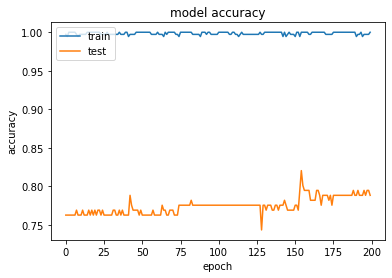

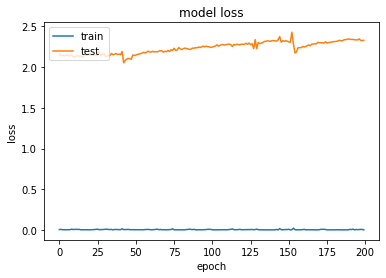

In [44]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Iteration 2

In [54]:
# create model
model1 = Sequential()
model1.add(Dense(12, input_dim=22, activation='sigmoid'))
model1.add(Dense(8,activation='sigmoid'))
model1.add(Dense(1,activation='relu'))

# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model1.fit(X, Y, validation_split=0.3, epochs=100, batch_size=15)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.5801 - accuracy: 0.7535 - val_loss: 0.6425 - val_accuracy: 0.6731
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7562 - val_loss: 0.6429 - val_accuracy: 0.6731
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7562 - val_loss: 0.6376 - val_accuracy: 0.6731
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7562 - val_loss: 0.6254 - val_accuracy: 0.6731
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.7562 - val_loss: 0.6304 - val_accuracy: 0.6731
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7562 - val_loss: 0.6329 - val_accuracy: 0.6731
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.7590 - val_loss: 0.6201 - val_accuracy: 0.6731
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8227 - val_loss: 0.8846 - val_accuracy: 0.7436
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8227 - val_loss: 0.8944 - val_accuracy: 0.7500
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8227 - val_loss: 0.8678 - val_accuracy: 0.7500
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8255 - val_loss: 0.8765 - val_accuracy: 0.7500
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8310 - val_loss: 0.8504 - val_accuracy: 0.7500
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8283 - val_loss: 0.8492 - val_accuracy: 0.7564
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8310 - val_loss: 0.8518 - val_accuracy: 0.7564
Epoch 

In [48]:
# evaluate the model
scores = model1.evaluate(X, Y)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 928us/step - loss: 0.5241 - accuracy: 0.7660
accuracy: 76.60%


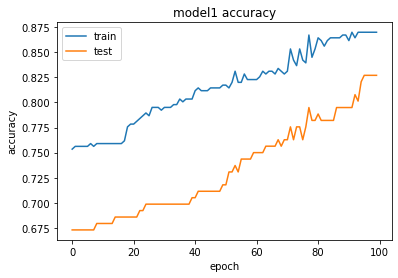

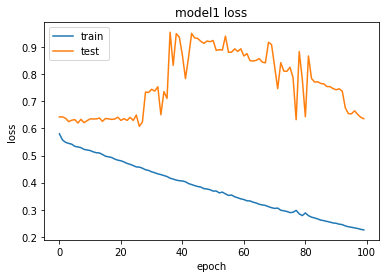

In [57]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Iteration 3

In [62]:
# create model
model2 = Sequential()
model2.add(Dense(12, input_dim=22, activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1,activation='relu'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model2.fit(X, Y, validation_split=0.3, epochs=200, batch_size=15)

Epoch 1/200
25/25 [==============================] - 1s 6ms/step - loss: 2.7107 - accuracy: 0.7701 - val_loss: 4.1205 - val_accuracy: 0.6667
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 2.3243 - accuracy: 0.7673 - val_loss: 3.8718 - val_accuracy: 0.6667
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 2.1879 - accuracy: 0.7729 - val_loss: 3.7940 - val_accuracy: 0.6731
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 2.1681 - accuracy: 0.7701 - val_loss: 3.9633 - val_accuracy: 0.6731
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 2.1632 - accuracy: 0.7701 - val_loss: 4.0163 - val_accuracy: 0.6603
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 2.1594 - accuracy: 0.7701 - val_loss: 3.9394 - val_accuracy: 0.6603
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 2.1563 - accuracy: 0.7729 - val_loss: 3.9334 - val_accuracy: 0.6603
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 0.9531 - accuracy: 0.8255 - val_loss: 2.5302 - val_accuracy: 0.6667
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 0.9215 - accuracy: 0.8310 - val_loss: 2.1876 - val_accuracy: 0.6731
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8218 - accuracy: 0.8393 - val_loss: 1.9019 - val_accuracy: 0.6795
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8184 - accuracy: 0.8532 - val_loss: 1.9130 - val_accuracy: 0.6731
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8052 - accuracy: 0.8393 - val_loss: 1.8398 - val_accuracy: 0.6667
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7732 - accuracy: 0.8393 - val_loss: 1.8223 - val_accuracy: 0.6859
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7697 - accuracy: 0.8393 - val_loss: 1.8042 - val_accuracy: 0.6667
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8975 - val_loss: 1.5993 - val_accuracy: 0.7564
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.9030 - val_loss: 1.6654 - val_accuracy: 0.7436
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.9003 - val_loss: 1.6619 - val_accuracy: 0.7500
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8975 - val_loss: 1.5876 - val_accuracy: 0.7564
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.9030 - val_loss: 1.5837 - val_accuracy: 0.7500
Epoch 178/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.9086 - val_loss: 1.5848 - val_accuracy: 0.7564
Epoch 179/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.9030 - val_loss: 1.6523 - val_accuracy: 0.7500
Epoch 180/200

In [63]:
# evaluate the model
scores = model2.evaluate(X, Y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 834us/step - loss: 0.6908 - accuracy: 0.8859
accuracy: 88.59%


## Iteration 4

In [69]:
# create model
model3 = Sequential()
model3.add(Dense(12, input_dim=22, activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='relu'))

# Compile model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model3.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 1s 5ms/step - loss: 2.1963 - accuracy: 0.7452 - val_loss: 3.7276 - val_accuracy: 0.6474
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 2.0283 - accuracy: 0.7507 - val_loss: 3.6331 - val_accuracy: 0.6474
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 1.8050 - accuracy: 0.7535 - val_loss: 3.4553 - val_accuracy: 0.6474
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 1.6076 - accuracy: 0.7590 - val_loss: 3.3700 - val_accuracy: 0.6474
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 1.5694 - accuracy: 0.7618 - val_loss: 3.3534 - val_accuracy: 0.6538
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 1.5542 - accuracy: 0.7618 - val_loss: 3.4215 - val_accuracy: 0.6538
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 1.5426 - accuracy: 0.7618 - val_loss: 3.4159 - val_accuracy: 0.6603
Epoch 8/150
3

Epoch 59/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.8781 - val_loss: 2.3516 - val_accuracy: 0.7308
Epoch 60/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.8809 - val_loss: 2.3524 - val_accuracy: 0.7308
Epoch 61/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8726 - val_loss: 2.3544 - val_accuracy: 0.7308
Epoch 62/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.8781 - val_loss: 2.2814 - val_accuracy: 0.7308
Epoch 63/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.8781 - val_loss: 2.2872 - val_accuracy: 0.7244
Epoch 64/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.8781 - val_loss: 2.2803 - val_accuracy: 0.7179
Epoch 65/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.8809 - val_loss: 2.2897 - val_accuracy: 0.7179
Epoch 

In [72]:
# evaluate the model
scores = model3.evaluate(X, Y)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 935us/step - loss: 1.0087 - accuracy: 0.8975
accuracy: 89.75%


# OUT of four iteration 1st iteration gives good accuracy about 92.84%

## Tuning of Hyperparameters :- Batch Size and Epochs

In [76]:
# create model
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=22,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(20,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [77]:
model=KerasClassifier(build_fn=create_model,verbose=0)
# Define Grid Search parameters
batch_size=[10,20]
epochs=[10,50]
# Creating dictionary of Grid Search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
# Built and Fit the Grid Search CV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.952, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.798, total=   1.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.738, total=   0.9s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.864, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.845, total=   0.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.990, total=   2.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.837, total=   1.9s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.777, total=   2.0s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.854, total=   2.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.893, total=   2.6s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.971, total=   1.4s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.798, total=   0.9s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.709, total=   0.8s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.786, total=   0.9s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.825, total=   0.7s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=1.000, total=   1.2s
[CV] batch_size=20, epochs=50 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   26.5s finished


In [78]:
# Summarize the result
print('Best: {}u using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best: 0.8779686212539672u using {'batch_size': 20, 'epochs': 50}


In [79]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8779686212539672, using {'batch_size': 20, 'epochs': 50}
0.8393203973770141,0.07115505359939002 with: {'batch_size': 10, 'epochs': 10}
0.870238971710205,0.07085150209743273 with: {'batch_size': 10, 'epochs': 50}
0.8179238200187683,0.08583908938265263 with: {'batch_size': 20, 'epochs': 10}
0.8779686212539672,0.07267595886432529 with: {'batch_size': 20, 'epochs': 50}


## Tuning of Hyperparameters: Learning Rate & Dropout Rate

In [83]:
from keras.layers import Dropout

# Define the model
def create_model(learning_rate,dropout_rate):
    model=Sequential()
    model.add(Dense(12,input_dim=22,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim=12,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [84]:
# Create the model
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=20,epochs=10)

#Define grid search parameters
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]

param_grid=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

In [85]:
#fit the GridSearch CV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=1.000, total=   1.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.750, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.544, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.689, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.718, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.894, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.808, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.718, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.9s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.796, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.6s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.845, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.606, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.750, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.650, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.680, total=   0.7s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.699, total=   0.7s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=1.000, total=   0.7s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   37.5s finished


In [86]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8122292876243591, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7402912616729737,0.14783127847273383 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8122292876243591,0.05805412344218278 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.6769790887832642,0.04816211628178922 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.806329345703125,0.09866037445059306 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7694174766540527,0.11952004482633187 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7364077568054199,0.15359763543603858 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8024832010269165,0.09780816936887611 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7383495092391967,0.15292726101196705 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


## Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [87]:
def create_model(activation_fn, kernel_initializer):
    model=Sequential()
    model.add(Dense(12,input_dim=22,kernel_initializer=kernel_initializer,activation=activation_fn))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim=12, kernel_initializer=kernel_initializer,activation=activation_fn))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer=kernel_initializer,activation=activation_fn))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=adam)
    return model

In [88]:
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=20,epochs=10)
activation_fn=['softmax','relu','tanh','linear']
kernel_initializer=['uniform','normal','zero']

param_grid=dict(activation_fn=activation_fn,kernel_initializer=kernel_initializer)

In [90]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,verbose=10,cv=KFold())
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.000, total=   0.8s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.250, total=   0.8s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.476, total=   0.8s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.320, total=   0.8s
[CV] activation_fn=softmax, kernel_initializer=uniform ...............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=uniform, score=0.301, total=   1.0s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.000, total=   0.8s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.250, total=   0.7s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.476, total=   0.7s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.4s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.320, total=   0.8s
[CV] activation_fn=softmax, kernel_initializer=normal ................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.2s remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=normal, score=0.301, total=   1.0s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=0.000, total=   0.7s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=0.250, total=   0.8s
[CV] activation_fn=softmax, kernel_initializer=zero ..................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=softmax, kernel_initializer=zero, score=0.476, total=   0.9s
[CV] activation_fn=softmax, 

[CV]  activation_fn=tanh, kernel_initializer=zero, score=1.000, total=   0.7s
[CV] activation_fn=tanh, kernel_initializer=zero .....................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=tanh, kernel_initializer=zero, score=0.750, total=   0.8s
[CV] activation_fn=tanh, kernel_initializer=zero .....................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=tanh, kernel_initializer=zero, score=0.524, total=   1.0s
[CV] activation_fn=tanh, kernel_initializer=zero .....................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  activation_fn=tanh, kernel_initializer=zero, score=0.680, total=   0.8s
[CV] activation_fn=tanh, kernel_initializer=zero .....................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   51.7s finished


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [91]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8257281541824341, using {'activation_fn': 'relu', 'kernel_initializer': 'normal'}
0.26941747665405275,0.15435061244017306 with: {'activation_fn': 'softmax', 'kernel_initializer': 'uniform'}
0.26941747665405275,0.15435061244017306 with: {'activation_fn': 'softmax', 'kernel_initializer': 'normal'}
0.26941747665405275,0.15435061244017306 with: {'activation_fn': 'softmax', 'kernel_initializer': 'zero'}
0.8219753503799438,0.06740150626953248 with: {'activation_fn': 'relu', 'kernel_initializer': 'uniform'}
0.8257281541824341,0.09863332899356846 with: {'activation_fn': 'relu', 'kernel_initializer': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_fn': 'relu', 'kernel_initializer': 'zero'}
0.755862581729889,0.12121082986732194 with: {'activation_fn': 'tanh', 'kernel_initializer': 'uniform'}
0.7326549649238586,0.130748972931836 with: {'activation_fn': 'tanh', 'kernel_initializer': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_fn': 'tanh', 'kerne

## Tuning of Hyperparameter :-Number of Neurons in activation layer

In [92]:
def create_model(neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,input_dim=22,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=adam)
    return model

In [94]:
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=10,epochs=50)

neuron1=[4,8,16]
neuron2=[2,4,8]

param_grid=dict(neuron1=neuron1,neuron2=neuron2)

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   2.0s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.750, total=   2.5s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.864, total=   2.2s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.883, total=   2.2s
[CV] neuron1=4, neuron2=2 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.8s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=2, score=0.883, total=   2.7s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.5s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.933, total=   3.0s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.5s remaining:    0.0s


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.885, total=   2.7s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   17.2s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.854, total=   2.5s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.8s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.903, total=   2.6s
[CV] neuron1=4, neuron2=4 ............................................
Epoch 1/50


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   22.4s remaining:    0.0s


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ................ neuron1=4, neuron2=4, score=0.932, total=   2.8s
[CV] neuron1=4, neuron2=8 ............................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50

Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ............... neuron1=16, neuron2=2, score=0.837, total=   2.6s
[CV] neuron1=16, neuron2=2 ...........................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epo

Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ............... neuron1=16, neuron2=8, score=0.903, total=   2.3s
[CV] neuron1=16, neuron2=8 ...........................................
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
[CV] ............... neuron1=16, neuron2=8, score=0.825, total=   2.8s
[CV] neuron1=16, neuron2=8 .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.9min finished


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [95]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9013256072998047, using {'neuron1': 4, 'neuron2': 4}
0.8762135982513428,0.07938043591065364 with: {'neuron1': 4, 'neuron2': 2}
0.9013256072998047,0.02971145415473529 with: {'neuron1': 4, 'neuron2': 4}
0.9012882590293885,0.05433396099349528 with: {'neuron1': 4, 'neuron2': 8}
0.8509522080421448,0.04798566278022618 with: {'neuron1': 8, 'neuron2': 2}
0.8721620559692382,0.0738858654510929 with: {'neuron1': 8, 'neuron2': 4}
0.8838312268257141,0.05048017653323362 with: {'neuron1': 8, 'neuron2': 8}
0.825634777545929,0.09447194567415225 with: {'neuron1': 16, 'neuron2': 2}
0.8625093340873718,0.0700075692524227 with: {'neuron1': 16, 'neuron2': 4}
0.8915235280990601,0.048217117655532764 with: {'neuron1': 16, 'neuron2': 8}


## Training the Model with optimum values of Hyperparameters

In [97]:
# Define Model
def create_model():
    model=Sequential()
    model.add(Dense(8,input_dim=22,kernel_initializer='normal',activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim=8,kernel_initializer='normal',activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [98]:
# Create Model
model=KerasClassifier(build_fn=create_model,verbose=10,batch_size=10,epochs=50)

# Fitting model
model.fit(X,Y)

#Predicting the results
y_pred=model.predict(X)
y_pred

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


C:\Users\smile\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(Y,y_pred))

0.9497098646034816


In [105]:
history=model.fit(X,Y,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
Epoch 2/150
Epoch 3/150
Epoch 4/150
Epoch 5/150
Epoch 6/150
Epoch 7/150
Epoch 8/150
Epoch 9/150
Epoch 10/150
Epoch 11/150
Epoch 12/150
Epoch 13/150
Epoch 14/150
Epoch 15/150
Epoch 16/150
Epoch 17/150
Epoch 18/150
Epoch 19/150
Epoch 20/150
Epoch 21/150
Epoch 22/150
Epoch 23/150
Epoch 24/150
Epoch 25/150
Epoch 26/150
Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64/150
Epoch 65/150
Epoch 66/150
Epoch 67/150
Epoch 68/150
Epoch 69/150
Epoch 70/150
Epoch 71/150
Epoch 72/150
Epoch 73/150
Epoch 74/150
Epoch 75/150
Epoch 76/150
Epoch 77/150
Epoch 78

Text(0, 0.5, 'accuracy')

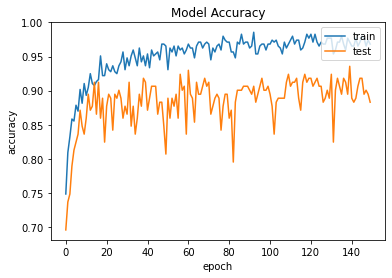

In [107]:
import matplotlib.pyplot as plt
# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train','test'],loc='upper right')
plt.xlabel('epoch');plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

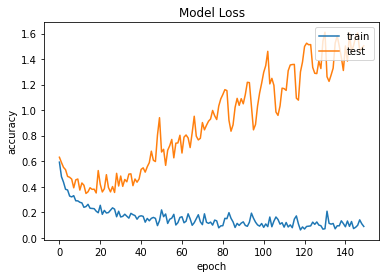

In [108]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper right')
plt.xlabel('epoch');plt.ylabel('accuracy')

# Hyperparameters all at once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim =22,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=1.000, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   1.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=1.000, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.5s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.6s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.5s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.4s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.680, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learnin

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.952, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.798, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.689, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.971, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.583, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.728, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, 

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=1.000, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.942, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.788, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.767, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.904, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.767, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.680, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=1.000, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.680, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   2.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.748, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.990, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.903, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.893, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.893, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.962, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.856, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.796, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.718, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.757, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.885, total=   2.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.728, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.728, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.971, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   2.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.854, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.816, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.883, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.865, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.760, total=   2.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.718, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.718, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.923, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   2.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.699, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.524, total=   2.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.699, total=   2.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=1.000, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.750, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.680, total=   2.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.699, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=1.000, total=   2.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.680, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.699, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.971, total=   4.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.779, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.738, total=   3.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.883, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.893, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   4.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.817, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.874, total=   4.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.825, total=   5.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.864, total=   4.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.913, total=   5.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.760, total=   5.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.485, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.689, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.631, total=   3.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.962, total=   3.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.788, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.728, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.893, total=   3.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.922, total=   3.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.894, total=   2.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.827, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.806, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.806, total=   3.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.777, total=   3.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.971, total=   3.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.798, total=   3.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   4.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   3.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   2.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   3.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.524, total=   3.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, 

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=0.680, total=   4.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=0.699, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=1.000, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.750, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.524, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.680, total=   3.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=1.000, total=   4.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.750, total=   3.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.524, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learnin

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.786, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.990, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.769, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.660, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.699, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.952, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.524, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, 

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.524, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.806, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.990, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.788, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.641, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.699, total=   1.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.760, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.806, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.825, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.769, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.796, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.933, total=   1.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.740, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.738, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=1.000, total=   2.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   3.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.0

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.680, total=   2.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.728, total=   2.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.962, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.856, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.854, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.816, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.883, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.942, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.712, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.524, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.689, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   2.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=1.000, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.524, total=   2.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.689, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.699, total=   2.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.933, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.904, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.709, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.816, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.864, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.990, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.524, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.670, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.699, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, 

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   2.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   2.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   1.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.689, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.825, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.845, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.883, total=   2.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.731, total=   2.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.573, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.738, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.990, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.750, total=   2.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   2.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.796, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.816, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.962, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.885, total=   4.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.922, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.883, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.816, total=   3.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.971, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.856, total=   4.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learnin

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.641, total=   4.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.689, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.757, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.971, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.712, total=   4.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.515, total=   3.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.806, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.835, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.971, total=   3.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.856, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.854, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.913, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.903, total=   3.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.952, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.846, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.524, total=   3.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.777, total=   4.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=1.000, total=   5.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.769, total=   4.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.806, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.845, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.971, total=   4.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neu

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=0.933, total=   4.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=0.932, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=0.913, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.903, total=   5.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.952, total=   4.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.837, total=   4.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.709, total=   4.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.728, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.942, total=   4.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.301, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learnin

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.709, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.767, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=1.000, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.702, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.689, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=1.000, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neu

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.524, total=   1.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.767, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.816, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.952, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.709, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.856, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.740, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.680, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.757, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.990, total=   0.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.750, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neu

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.738, total=   1.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.621, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, n

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   2.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.825, total=   2.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.883, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=1.000, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.798, total=   2.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.728, total=   2.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.796, total=   2.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   2.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.856, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.740, total=   3.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   2.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.524, total=   2.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.874, total=   2.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.893, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.971, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.808, total=   3.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.718, total=   3.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.816, total=   2.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, 

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.904, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.740, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.524, total=   2.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   2.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.699, total=   2.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   3.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.524, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.680, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   3.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.846, total=   2.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.718, total=   2.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.796, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.981, total=   2.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.760, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.524, total=   1.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.699, total=   2.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.904, total=   2.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.702, total=   2.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   4.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.680, total=   4.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.699, total=   4.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=1.000, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.856, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.825, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.845, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.922, total=   4.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.962, total=   5.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.769, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.563, total=   4.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.680, total=   4.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.728, total=   4.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=1.000, total=   6.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.750, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   3.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.748, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.786, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   3.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.875, total=   4.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.864, total=   4.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.816, total=   4.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.874, total=   4.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.962, total=   5.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.740, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.631, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.709, total=   3.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.748, total=   4.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=1.000, total=   4.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuro

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   5.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.767, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.786, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuro

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=1.000, total=   4.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=0.827, total=   4.0s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=0.854, total=   3.8s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.825, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.835, total=   3.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.962, total=   4.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.573, total=   8.3s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.699, total=  12.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.757, total=  10.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=1.000, total=   2.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   2.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.680, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.699, total=   3.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   5.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learnin

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.760, total=   3.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.524, total=   3.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.709, total=   2.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.796, total=   2.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.904, total=   2.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.769, total=   2.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neur

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.563, total=   3.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.728, total=   4.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.806, total=   3.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuro

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   0.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.320, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.760, total=   0.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.524, total=   0.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.748, total=   0.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.825, total=   0.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.885, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.779, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.689, total=   0.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.660, total=   0.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.981, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.680, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=1.000, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuro

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.699, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.524, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.699, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.893, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.883, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.874, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.962, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.837, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.874, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.738, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.825, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.865, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.689, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.893, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.893, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.913, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.962, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.875, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.854, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, 

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.757, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.816, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.981, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   3.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.524, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.699, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=1.000, total=   2.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.750, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.680, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.699, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=1.000, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.524, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.680, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.699, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.981, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.769, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   2.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.757, total=   2.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.757, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=1.000, total=   2.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.846, total=   3.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.883, total=   2.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.854, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.883, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.856, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.827, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.660, total=   2.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.718, total=   3.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.757, total=   2.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.952, total=   2.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.650, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.932, total=   2.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.922, total=   2.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   4.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.837, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.816, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.854, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.883, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.885, total=   2.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.808, total=   2.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.505, total=   2.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.699, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.816, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, n

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   2.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.680, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.699, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=1.000, total=   2.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.524, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.680, total=   3.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.699, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.750, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.524, total=   3.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.680, total=   3.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.699, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learnin

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.524, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.709, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.699, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.923, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.740, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neur

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.495, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.718, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.621, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuro

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.680, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.885, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.779, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.709, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.709, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.923, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.680, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=1.000, total=   1.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.680, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.699, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuro

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.534, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.728, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.738, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.740, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.583, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.709, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.699, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.825, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.883, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.874, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.962, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.798, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.738, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.777, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.738, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.894, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.699, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.835, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.874, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.893, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.971, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.827, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.777, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, 

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.748, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.680, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=1.000, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.874, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.981, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.827, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.777, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.864, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.621, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.650, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.767, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.981, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   2.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.777, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.990, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.827, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.786, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.903, total=   2.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.874, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.971, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.846, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.592, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.709, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.777, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.990, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.612, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.913, total=   2.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.913, total=   2.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.990, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.856, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.786, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.806, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.845, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.933, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.760, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.660, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.709, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.728, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, n

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   2.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   2.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.893, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.883, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=1.000, total=   2.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.738, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.874, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.893, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.837, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.524, total=   2.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.883, total=   2.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.680, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.301, total=   0.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learnin

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.750, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.712, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neur

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.485, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.728, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuro

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=1.000, total=   0.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.740, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.962, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   0.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.680, total=   0.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   0.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.990, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.680, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuro

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.612, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8, score=0.709, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.806, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.835, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.893, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.933, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.837, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4, score=0.689, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.757, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.990, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.699, total=   1.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.816, total=   2.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.845, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.883, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.971, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.856, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8, score=0.738, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, 

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.699, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.864, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.990, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.798, total=   1.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.670, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.748, total=   1.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.990, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.505, total=   1.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=1.000, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.738, total=   2.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=1.000, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.817, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.874, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=0.864, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.786, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.798, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.856, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   2.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.680, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.757, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=1.000, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   2.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.893, total=   1.8s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.874, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   2.5s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.837, total=   2.4s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.806, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2, score=0.845, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.864, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=1.000, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.769, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.485, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.709, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.699, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, n

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   2.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   2.3s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.903, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.922, total=   2.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8, score=1.000, total=   2.2s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.777, total=   1.9s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.816, total=   2.1s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.854, total=   2.7s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.779, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.524, total=   2.6s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.709, total=   2.0s
[CV] activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.301, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.699, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.680, total=   0.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.699, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=1.000, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.738, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.757, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.904, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.476, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.301, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.524, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.680, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.699, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.981, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.808, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.835, total=   0.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.942, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.740, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   0.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.524, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.699, total=   0.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=1.000, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.750, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.680, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=1.000, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   0.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.680, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.699, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=1.000, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.864, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.864, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.962, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.817, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.777, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.796, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.835, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.933, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.827, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.767, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.864, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.835, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.893, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.990, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.846, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.806, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.825, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.845, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=1.000, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.837, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.524, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.680, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.750, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=1.000, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.750, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, sco

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.680, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, s

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.874, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.835, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.903, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.702, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.856, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.757, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.709, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.816, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.952, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.680, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.971, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.856, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.0

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.835, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.845, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.883, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.990, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.817, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.777, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.816, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.748, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.923, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.680, total=   2.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.699, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.680, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.699, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=1.000, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.524, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.680, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.476, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.699, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.250, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.680, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.699, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=1.000, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.750, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.738, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.767, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.865, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.942, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.760, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.524, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.757, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.817, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.769, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.524, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.689, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.777, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.942, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.534, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.699, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.689, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.874, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.883, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.962, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.788, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.757, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.786, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.854, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.865, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.846, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.650, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.738, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.757, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.835, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.883, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.990, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.808, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.738, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.796, total=   2.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.786, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.990, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.779, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.524, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.320, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.981, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.788, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.689, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.825, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.971, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.817, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, sco

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.777, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.825, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.913, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, s

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   2.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.854, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.845, total=   2.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.913, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.846, total=   2.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.835, total=   2.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.748, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.738, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.981, total=   2.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.680, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=1.000, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.875, total=   2.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.0

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.883, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.883, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.883, total=   2.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.990, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.904, total=   2.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.786, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.748, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.816, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.913, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.680, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.874, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.990, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.894, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.806, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.874, total=   2.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.990, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.524, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.825, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.250, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.320, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.250, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.524, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=1.000, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.728, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.952, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=1.000, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.524, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.680, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2, score=0.699, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.933, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.750, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2, score=0.670, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8, score=0.777, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.952, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2, score=0.750, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8, score=0.699, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   0.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8, score=0.524, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=1.000, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8, score=0.750, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.680, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4, score=0.699, total=   1.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score=0.971, total=   0.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8, score

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.476, total=   0.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.680, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4, score=0.718, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=1.000, total=   2.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.816, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2, score=0.845, total=   1.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, score=0.990, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.788, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.699, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2, score=0.786, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8, score=0.757, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.942, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2, score=0.760, total=   2.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.544, total=   2.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.728, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8, score=0.835, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8, score=0.524, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.845, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4, score=0.854, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8, score=0.990, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.788, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4, score=0.816, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2, score=0.631, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4, score=0.827, total=   2.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.524, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2, score=0.680, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.971, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.779, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2, score=0.699, total=   1.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8, score=0.845, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.942, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, score=0.779, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2, sco

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.709, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8, score=0.796, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, score=0.981, total=   1.2s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2, s

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   2.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.680, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learni

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4, score=0.699, total=   2.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.825, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.845, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, score=0.874, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=1.000, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.846, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4, score=0.709, total=   2.3s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1,

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.709, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=0.748, total=   2.1s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4, score=0.923, total=   2.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rat

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.750, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.524, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2, score=0.680, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.699, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2, score=0.837, total=   2.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.0

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.718, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.883, total=   1.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.883, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.971, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.875, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.796, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.718, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.786, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=0.798, total=   1.6s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, 

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.680, total=   1.4s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.874, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.990, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.846, total=   1.9s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, ne

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.786, total=   2.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.864, total=   2.0s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.942, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1

[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.524, total=   2.5s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.757, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.874, total=   1.8s
[CV] activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   1.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.689, total=   1.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   1.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.524, total=   1.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.845, total=   1.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.962, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.769, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.786, total=   2.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.854, total=   1.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=1.000, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.524, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.680, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.748, total=   1.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, sco

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   1.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   1.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.689, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.962, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.553, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.806, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.913, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.827, total=   1.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.680, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.777, total=   1.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.885, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.750,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   1.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.680, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.699, total=   1.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   1.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.680, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.699,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   1.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.750, total=   1.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.524, total=   1.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.680, total=

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.699, total=   1.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=1.000, total=   2.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.750, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.524,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.680, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   1.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=1.000, total=   1.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.750, total=   1.8s

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.748, total=   2.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.767, total=   5.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.893, total=   5.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.798, total=   2.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.786, total=   2.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.835, total=   2.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=1.000, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.798, total=   2.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.825, total=   2.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.883, total=   2.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=1.000, total=   2.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=0.760, total=   2.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, sco

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.680, total=   7.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.699, total=   7.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, score=1.000, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, s

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.709, total=   2.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.835, total=   2.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.845, total=   2.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.817, total=   2.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.786, total=   2.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.835, total=   2.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.933, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.817, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.854, total=   2.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.748, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=1.000, total=   2.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.740, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.524,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.699, total=   2.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.699, total=   2.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score=1.000, total=   2.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.680, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.699, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8, score=1.000,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.750, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.524, total=   2.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.680, total=   2.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.699, total=

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=1.000, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.750, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.524, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.680,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   2.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=1.000, total=   2.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.750, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.524, total=   2.1s

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.922, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   3.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.962, total=   3.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.856, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.835, total=   3.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.864, total=   3.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, 

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.883, total=   3.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=1.000, total=   3.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.750, total=   3.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.825, total=   3.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.874, total=   4.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.893, total=   3.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.750, total=   2.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.544, total=   3.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.728, total=   3.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.990, total=   2.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.865, total=   2.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.835, total=   4.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.835, total=   3.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.903, total=   3.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   3.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.777, total=   3.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.893, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.883, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.750, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.524, total=   3.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.680, total=   3.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=1.000, total=   3.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.750, total=   3.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2, score=0.699, total=   3.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=1.000, total=   3.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   2.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.680, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.699, total=   3.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   3.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.750,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.524, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.680, total=   3.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.699, total=   4.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.750, total=   3.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.524, total=   3.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.680, total=   3.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=1.000, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.750, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8, score=0.699, total=   1.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=1.000, total=   1.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.750, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.786, total=   1.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.825, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=1.000, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.680, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.748, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.854, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.750, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.524, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.689, total=   1.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4, score=0.728, total=   1.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.962, total=   1.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.750, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.767, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.845, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.952, total=   0.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.524, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.680, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.709, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=1.000,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.750, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   0.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.680, total=   1.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=1.000, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   0.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.680,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2, score=0.699, total=   1.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.750, total=   0.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.524, total=

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.680, total=   1.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.699, total=   1.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=1.000, total=   1.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.750,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.524, total=   1.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.680, total=   1.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   1.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=1.000, total=   0.9s

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.827, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.816, total=   2.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.738, total=   2.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.981, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.827, total=   2.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.757, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.845, total=   2.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=1.000, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=0.750, total=   1.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.883, total=   2.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.883, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2, score=1.000, total=   2.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.524, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.680, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.699, total=   2.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2, sco

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.760, total=   1.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.524, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.835, total=   2.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=1.000, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.827, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8, score=0.893, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4, score=0.874, total=   2.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.990, total=   2.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score=0.846, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.680, total=   1.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4, score=0.699, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=1.000, total=   1.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8, score=0.750,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.524, total=   2.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.680, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4, score=0.699, total=   2.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8, score

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.750, total=   2.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.524, total=   2.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.680, total=   1.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4, score=0.699,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=1.000, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.750, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.524, total=   2.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4, score=0.680, total=

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2, score=0.699, total=   1.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=1.000, total=   1.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.750, total=   2.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4, score=0.524,

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.680, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2, score=0.699, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=1.000, total=   1.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4, score=0.750, total=   1.9s

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   4.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.893, total=   2.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.864, total=   3.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.990, total=   3.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.846, total=   3.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2, score=0.883, total=   3.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, 

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.913, total=   3.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, score=0.874, total=   3.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2, score=1.000, total=   3.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, ne

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.875, total=   3.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.874, total=   3.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8, score=0.893, total=   3.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=1.000, total=   3.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.750, total=   3.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8, score=0.524, total=   3.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4, score=0.903, total=   5.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   4.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8, score=0.894, total=   4.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, ne

# Conclusion:
##                       we performed neural network on this dataset ,while performing Hyperparameter all at once its running after several hours it shown you don't have a memory to run this page.By iterative performance 1st iteration shown good accuracy,but while performin tuning of hyperparameters the optimum value model shown good accuracy of 92%.